In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv(r"C:\Users\darfo\Desktop\Курс_дата_сайнтист\Модуль_5\ДЗ\titanic\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Age', ylabel='Count'>

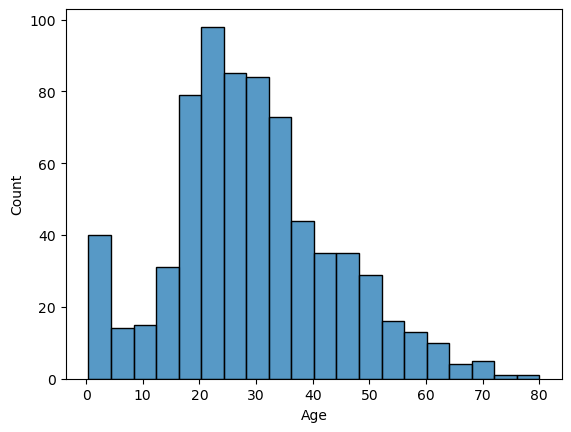

In [59]:
#Для анализа данных необходимо, чтобы все пропуски были заполнены, пожтому проведем обработку
#Уберем пару пропусков из Embarked, т.к. критично не окажет влияния на качество выборки
df.dropna(subset=['Embarked'], axis=0, how='any', inplace=True)
#Посмотрим на гистограмму распределения столбца возраста до заполнения пропусков
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

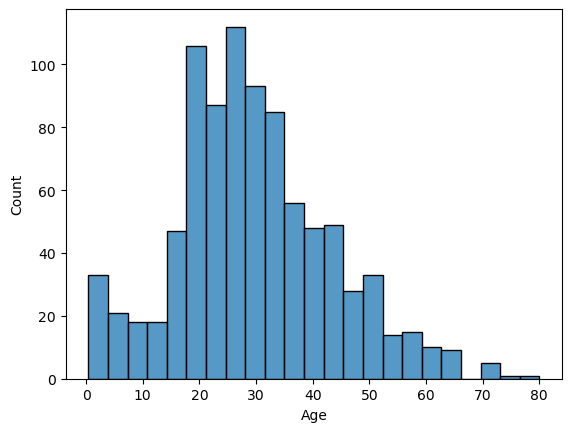

In [60]:
#Из гистограммы видно, что в основном пассажиром было от 20 до 30 лет
#Заполним пропуски возраста и посмотрим на новую гистограмму
df['Age']=df['Age'].interpolate()
sns.histplot(df['Age'])

In [61]:
#Убедимся в том, что все пропуски заполнены и можно проводить анализ
df.info()
#Столбец Cabin пропустим, т.к. не удалось найти зависимости с каким-либо параметром в датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


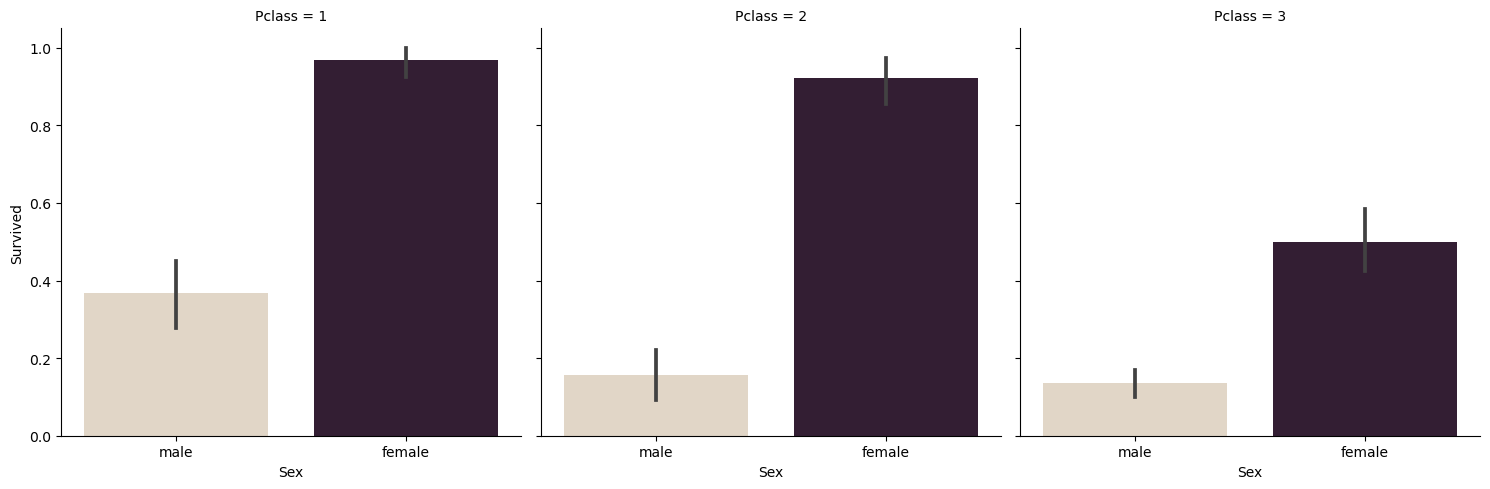

In [73]:
#Начинаем анализ данных.
#Объединим два параметра - класс и пол и посмотрим на выживаемость
sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',
            kind='bar', palette="ch:.25")
#Из графика видно, что чем выше класс пассажира, тем больше его шанс выжить. Также видим, что вероятнее выживает женщина.

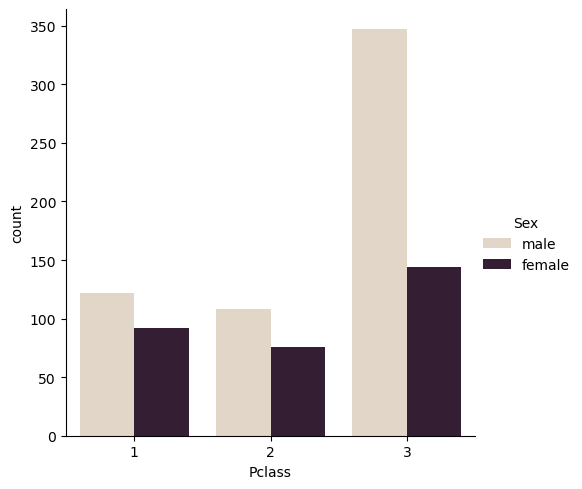

In [77]:
#Графиком ниже подтверждаем, что мужчина в третьем классе точно не выживет
sns.catplot(data = df, x='Pclass', hue='Sex',
            kind='count', palette="ch:.25")

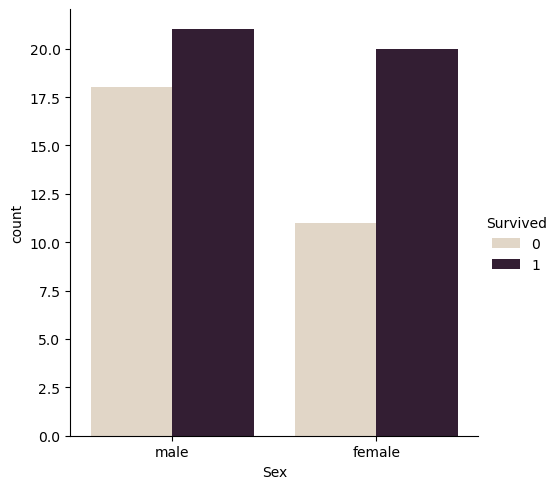

In [85]:
#Анализ по возрасту удобнее проводить интервалами.
#Проверим на выживаемость детей меньше 10 лет. Создадим новый датафрейм только с детьми:
child= df[df.Age<10]
sns.catplot(data = child, x='Sex', hue='Survived',
            kind='count', palette="ch:.25")
#Видно, что детей вне зависимости от пола, в основном спасали

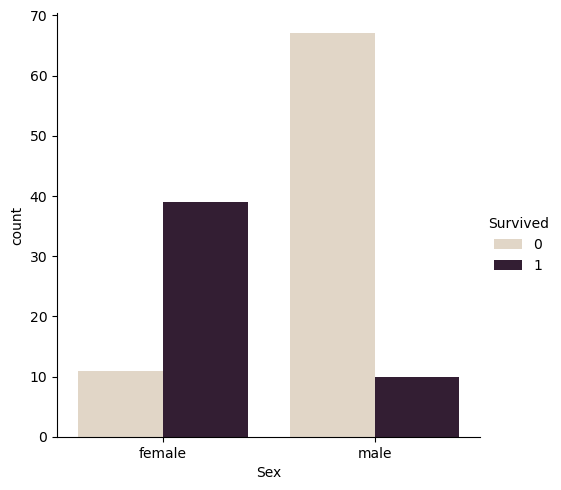

In [88]:
#Проверим подростков 
teenager=df[(df.Age<20) & (df.Age>10)] 
sns.catplot(data = teenager, x='Sex', hue='Survived',
            kind='count', palette="ch:.25")
#У подростков уже ситуация меняется. Девушек в основнос спасались.

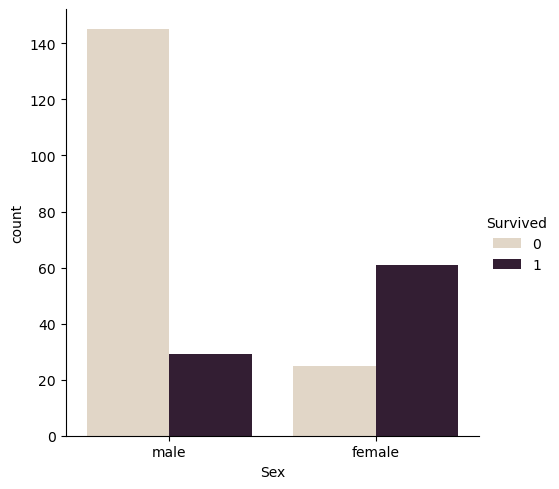

In [90]:
#Проверим самый распространенный возраст пассажиров на борту от 20 до 30 лет
adult=df[(df.Age>20) & (df.Age<30)] 
sns.catplot(data = adult, x='Sex', hue='Survived',
            kind='count', palette="ch:.25")
#Картина не изменилась. Наиболее вероятнее выжить женщине.

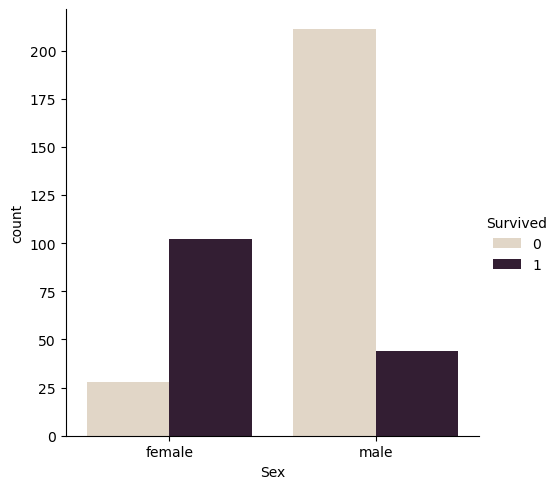

In [91]:
#Проверяем взрослых людей от 30 до 80 лет.
old=df[(df.Age>30) & (df.Age<80)] 
sns.catplot(data = old, x='Sex', hue='Survived',
            kind='count', palette="ch:.25")

In [93]:
#Основные выводы для поверки: ребенок до 10 лет, женщины и пассажиры 1 класса будут спасены.
#Проверим гипотезу на файле test.
df_test = pd.read_csv(r"C:\Users\darfo\Desktop\Курс_дата_сайнтист\Модуль_5\ДЗ\titanic\test.csv")

In [94]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [98]:
#Добавим в датафрейм колонку выживания
df_test['Survived'] = 1
#Применим наши фильтры
df_test.loc[(df_test.Sex == 'male')&(df_test.Pclass == 3), 'Survived'] = 0
df_test.loc[(df_test.Age < 10), 'Survived'] = 1
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [99]:
#Загрузим датафрейм, с которой будем проверять
df_check = pd.read_csv(r"C:\Users\darfo\Desktop\Курс_дата_сайнтист\Модуль_5\ДЗ\titanic\gender_submission.csv")

In [101]:
#Вычислим отклонение
df_check['errors'] = (df_test.Survived - df_check.Survived)**2
1 - df_check.errors.sum() / df_check.shape[0]
#В более чем 50% вариантов мы верно предсказали поведение модели.

0.69377990430622